In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data
city_data = []
# Print the begining of the logging.
print("Beginning Data Retrieval")
print("------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)
    #Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]
     
#Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, 
#this will cause programming errors when we are building the city_url because it adds the index, not the city name, 
#to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.
#We should use enumerate: for i, item in enumerate(list)

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | zhaotong
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | grand-santi
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | aksu
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | athabasca
Processing Record 12 of Set 1 | shimoda
Processing Record 13 of Set 1 | badou
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | rundu
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | pacific grove
Processing Record 19 of Set 1 | caraballeda
Processing Record 20 of Set 1 | lugazi
Processing Record 21 of Set 1 | itaituba
Processing Record 22 of Set 1 | petropavlovsk-kam

Processing Record 34 of Set 4 | mount hagen
Processing Record 35 of Set 4 | sitka
Processing Record 36 of Set 4 | grand gaube
Processing Record 37 of Set 4 | rovaniemi
Processing Record 38 of Set 4 | juneau
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | shchelyayur
City not found. Skipping...
Processing Record 41 of Set 4 | trelew
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | cabedelo
Processing Record 44 of Set 4 | comarapa
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | porto novo
Processing Record 47 of Set 4 | garissa
Processing Record 48 of Set 4 | paradwip
City not found. Skipping...
Processing Record 49 of Set 4 | batemans bay
Processing Record 50 of Set 4 | callaway
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | wulanhaote
City not found. Skipping...
Processing Record 3 of Set 5 | alexander city
Processing Record 4 of Set 5 | nikolayevsk-na-amure
Processing Record 5 of Set

Processing Record 24 of Set 8 | gemena
Processing Record 25 of Set 8 | cabra
Processing Record 26 of Set 8 | pitsunda
Processing Record 27 of Set 8 | teknaf
Processing Record 28 of Set 8 | karaul
City not found. Skipping...
Processing Record 29 of Set 8 | abha
Processing Record 30 of Set 8 | vao
Processing Record 31 of Set 8 | bedesa
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | uthal
Processing Record 36 of Set 8 | saleaula
City not found. Skipping...
Processing Record 37 of Set 8 | pinega
Processing Record 38 of Set 8 | tondano
Processing Record 39 of Set 8 | sosnovskoye
Processing Record 40 of Set 8 | batagay
Processing Record 41 of Set 8 | kavieng
Processing Record 42 of Set 8 | channel-port aux basques
Processing Record 43 of Set 8 | malwan
City not found. Skipping...
Processing Record 44 of Set 8 | pedernales
Processing Record 45 of Set 8 | baykit
Processing Record 46

Processing Record 14 of Set 12 | melbourne
Processing Record 15 of Set 12 | dicabisagan
Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | seabra
Processing Record 18 of Set 12 | vanimo
Processing Record 19 of Set 12 | esil
Processing Record 20 of Set 12 | surt
Processing Record 21 of Set 12 | amurzet
Processing Record 22 of Set 12 | tilichiki
Processing Record 23 of Set 12 | xuanhua
Processing Record 24 of Set 12 | marsh harbour
Processing Record 25 of Set 12 | whyalla
Processing Record 26 of Set 12 | sinnai
Processing Record 27 of Set 12 | ambon
Processing Record 28 of Set 12 | nizhneangarsk
Processing Record 29 of Set 12 | chepareria
Processing Record 30 of Set 12 | manali
Processing Record 31 of Set 12 | pangnirtung
Processing Record 32 of Set 12 | kambove
Processing Record 33 of Set 12 | brainerd
Processing Record 34 of Set 12 | makakilo city
Processing Record 35 of Set 12 | horadiz
Processing Record 36 of Set 12 | ashqelon
Processing Record 37 of Set 12 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,7.11,75,56,5.42,NZ,2022-04-13 10:38:00
1,Zhaotong,27.3167,103.7167,20.06,58,38,2.52,CN,2022-04-13 10:38:00
2,Severo-Kurilsk,50.6789,156.1250,-1.44,88,100,4.87,RU,2022-04-13 10:38:01
3,Saint-Philippe,-21.3585,55.7679,25.77,86,84,6.39,RE,2022-04-13 10:38:01
4,Port Alfred,-33.5906,26.8910,25.10,76,5,2.24,ZA,2022-04-13 10:38:01
5,Tuktoyaktuk,69.4541,-133.0374,-10.48,91,100,6.92,CA,2022-04-13 10:38:02
6,Grand-Santi,4.2500,-54.3833,23.03,97,83,1.13,GF,2022-04-13 10:38:02
7,Bredasdorp,-34.5322,20.0403,24.55,53,34,5.53,ZA,2022-04-13 10:38:02
8,Aksu,41.1231,80.2644,24.73,15,53,1.88,CN,2022-04-13 10:38:02
9,Jamestown,42.0970,-79.2353,15.77,62,100,4.12,US,2022-04-13 10:38:03


In [11]:
# Reorder the columns in DataFrame: 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-04-13 10:38:00,-46.6000,168.3333,7.11,75,56,5.42
1,Zhaotong,CN,2022-04-13 10:38:00,27.3167,103.7167,20.06,58,38,2.52
2,Severo-Kurilsk,RU,2022-04-13 10:38:01,50.6789,156.1250,-1.44,88,100,4.87
3,Saint-Philippe,RE,2022-04-13 10:38:01,-21.3585,55.7679,25.77,86,84,6.39
4,Port Alfred,ZA,2022-04-13 10:38:01,-33.5906,26.8910,25.10,76,5,2.24
5,Tuktoyaktuk,CA,2022-04-13 10:38:02,69.4541,-133.0374,-10.48,91,100,6.92
6,Grand-Santi,GF,2022-04-13 10:38:02,4.2500,-54.3833,23.03,97,83,1.13
7,Bredasdorp,ZA,2022-04-13 10:38:02,-34.5322,20.0403,24.55,53,34,5.53
8,Aksu,CN,2022-04-13 10:38:02,41.1231,80.2644,24.73,15,53,1.88
9,Jamestown,US,2022-04-13 10:38:03,42.0970,-79.2353,15.77,62,100,4.12


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the Citi_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

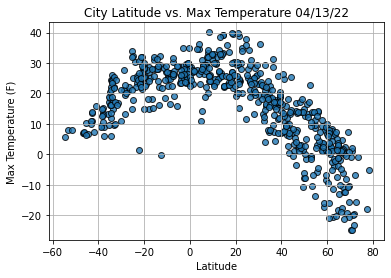

In [14]:
# Import time module
import time
#print(time.strftime("%x"))

# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

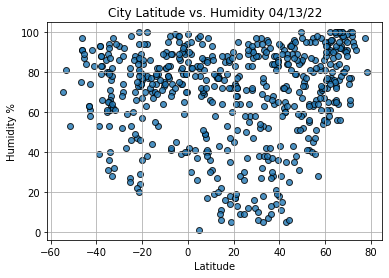

In [15]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

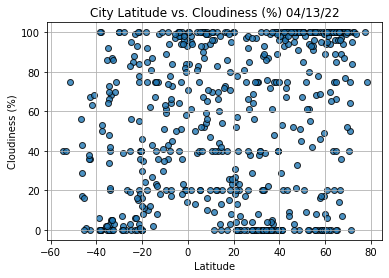

In [16]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

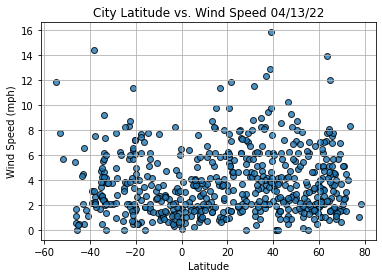

In [17]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, 
            edgecolor='black', linewidth=1, 
            marker='o', alpha = 0.8, 
            label = 'cities')

# Incorporate the other graph propertis.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

In [64]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value:{r_value:1.2f}")
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-04-13 10:38:04
Lat                         -54.8
Lng                         -68.3
Max Temp                     5.81
Humidity                       70
Cloudiness                     40
Wind Speed                  11.83
Name: 13, dtype: object

In [66]:
city_data_df["Lat"]>=0

0      False
1       True
2       True
3      False
4      False
       ...  
571     True
572    False
573     True
574    False
575    False
Name: Lat, Length: 576, dtype: bool

In [67]:
city_data_df.loc[city_data_df["Lat"]>=0].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Zhaotong,CN,2022-04-13 10:38:00,27.3167,103.7167,20.06,58,38,2.52
2,Severo-Kurilsk,RU,2022-04-13 10:38:01,50.6789,156.1250,-1.44,88,100,4.87
5,Tuktoyaktuk,CA,2022-04-13 10:38:02,69.4541,-133.0374,-10.48,91,100,6.92
6,Grand-Santi,GF,2022-04-13 10:38:02,4.2500,-54.3833,23.03,97,83,1.13
8,Aksu,CN,2022-04-13 10:38:02,41.1231,80.2644,24.73,15,53,1.88


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r-value:-0.85


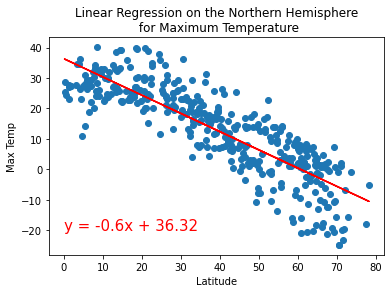

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(0,-20))

r-value:0.68


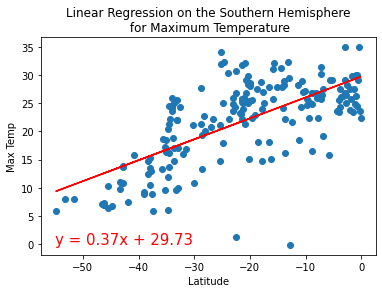

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,0))

r-value:0.31


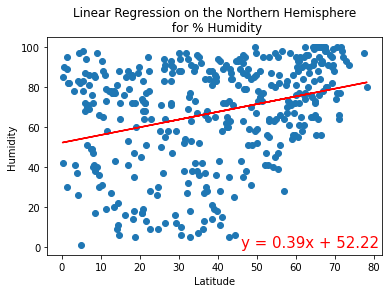

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', 'Humidity',(46,0))

r-value:0.09


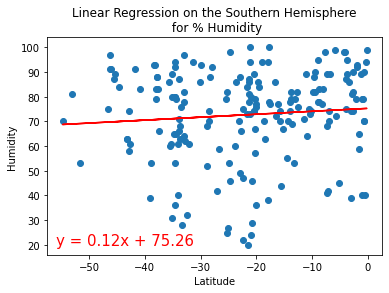

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', 'Humidity',(-56,20))

r-value:0.19


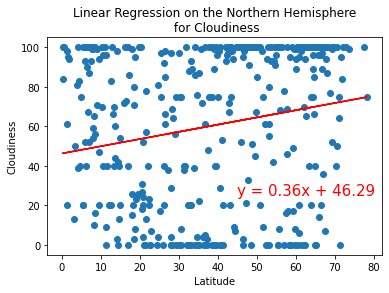

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Cloudiness', 'Cloudiness',(45,25))

r-value:0.34


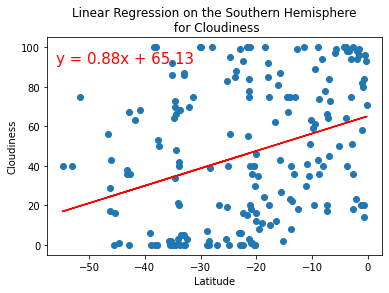

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Cloudiness', 'Cloudiness',(-56,92))

r-value:0.03


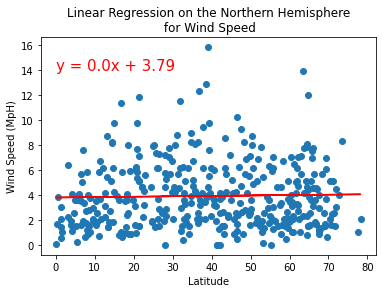

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed (MpH)',(0,14))

r-value:-0.19


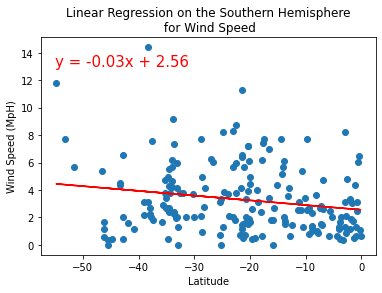

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed (MpH)',(-55,13))